In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [45]:
columns = ['latitude', 'longitude', 'value']

lat_values = np.linspace(45, 45.5, 1000)
lon_values = np.linspace(10, 10.5, 1000)
lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)

# Center of the Gaussian (in lat/lon)
lat0 = 45.25
lon0 = 10.25

# Standard deviations (controls the "spread")
sigma_lat = 0.5
sigma_lon = 0.5

# 2D Gaussian function
values = 1-np.exp(-(((lat_grid - lat0)**2) / (2 * sigma_lat**2) +
                    ((lon_grid - lon0)**2) / (2 * sigma_lon**2)))

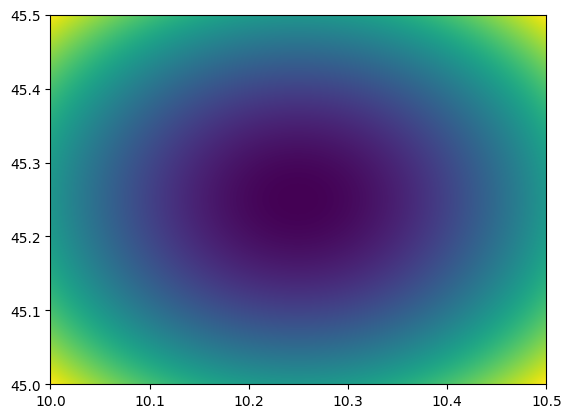

In [46]:
plt.imshow(values, extent=[lon_values.min(), lon_values.max(), lat_values.min(), lat_values.max()],
           origin='lower', aspect='auto', cmap='viridis')

In [44]:
data = np.zeros((1000,1000,3))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i,j,0] = lat_values[i]
        data[i,j,1] = lon_values[j]
        data[i,j,2] = values[i,j]

data = data.reshape(-1, 3)
df = pd.DataFrame(data, columns=columns)

df.to_csv('data.csv', index=False)

In [41]:
df

,latitude,longitude,value
0,45.0,10.000000,0.209611
1,45.0,10.000501,0.210267
2,45.0,10.001001,0.210924
3,45.0,10.001502,0.211582
4,45.0,10.002002,0.212240
...,...,...,...
999995,45.5,10.497998,0.212240
999996,45.5,10.498498,0.211582
999997,45.5,10.498999,0.210924
999998,45.5,10.499499,0.210267


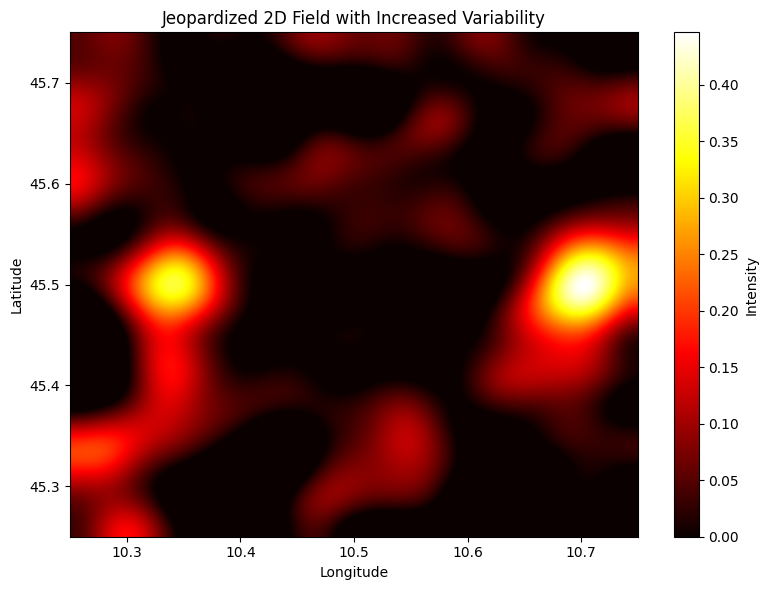

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
lat_lims = [45.25, 45.75]
lon_lims = [10.25, 10.75]
# Create grid of lat/lon values
lat_values = np.linspace(lat_lims[0], lat_lims[1], 1000)
lon_values = np.linspace(lon_lims[0], lon_lims[1], 1000)
lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)

# Parameters for the two "zones" of interest
lat_center_1, lon_center_1 = lat_lims[0] + .25, lon_lims[0] + .1  # First high-value center
lat_center_2, lon_center_2 = lat_lims[0] + .25, lon_lims[0] + .45 # Second high-value center

# Standard deviations (controls the "spread")
sigma_lat = 0.02
sigma_lon = 0.02

# Generate two Gaussian bumps (for two zones)
bump1 = np.exp(-(((lat_grid - lat_center_1)**2) / (2 * sigma_lat**2) + ((lon_grid - lon_center_1)**2) / (2 * sigma_lon**2)))
bump2 = np.exp(-(((lat_grid - lat_center_2)**2) / (2 * sigma_lat**2) + ((lon_grid - lon_center_2)**2) / (2 * sigma_lon**2)))

# Combine the bumps to form a field that has two high-value regions
combined_field = bump1 + bump2

# Add random noise to increase variability
random_noise = np.random.normal(loc=0, scale=10, size=combined_field.shape)  # Mean 0, std 10
combined_field += random_noise

# Smooth the combined field for a smooth transition between zones
smoothed_field = gaussian_filter(combined_field, sigma=50)

# Normalize the values to be between 0 and 100
smoothed_field = np.clip(smoothed_field, 0, 100)

# Plot with imshow
plt.figure(figsize=(8, 6))
plt.imshow(smoothed_field, extent=[lon_values.min(), lon_values.max(), lat_values.min(), lat_values.max()],
           origin='lower', cmap='hot', aspect='auto')

plt.colorbar(label='Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Jeopardized 2D Field with Increased Variability')
plt.tight_layout()
plt.show()


In [60]:
data = np.zeros((1000,1000,3))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i,j,0] = lat_values[i]
        data[i,j,1] = lon_values[j]
        data[i,j,2] = smoothed_field[i,j]

data = data.reshape(-1, 3)
df = pd.DataFrame(data, columns=columns)

df.to_csv('data_jeopardized.csv', index=False)